In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load your dataset
data = pd.read_csv('Songs.csv')

In [3]:
data.head()

,Emotion,Climate,Time,Playlist
0,Aggressive,Cloudy,Night,16
1,Normal,Cloudy,Night,1
2,Aggressive,Cloudy,Morning,45
3,Tired & Sleepy,Sunny,Travelling time,41
4,Tired & Sleepy,Sunny,Night,41


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotion   5000 non-null   object
 1   Climate   5000 non-null   object
 2   Time      5000 non-null   object
 3   Playlist  5000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None


In [5]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
          Playlist
count  5000.000000
mean     23.404800
std      13.427069
min       1.000000
25%      12.000000
50%      23.000000
75%      36.000000
max      45.000000


In [6]:
print("\nNull Values:")
print(data.isnull().sum())


Null Values:
Emotion     0
Climate     0
Time        0
Playlist    0
dtype: int64


C:\conda_tmp\ipykernel_5808\3532077799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Playlist', data=data, palette='viridis')


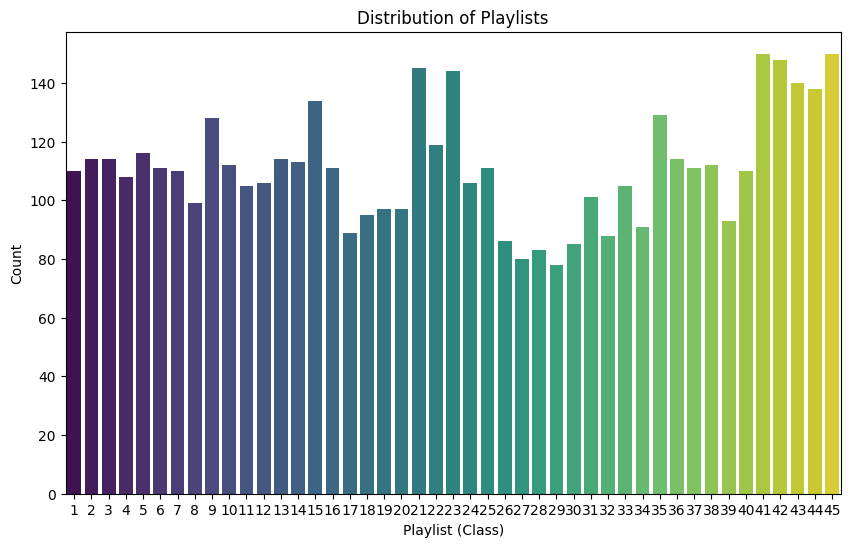

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable (playlist classes)
plt.figure(figsize=(10, 6))
sns.countplot(x='Playlist', data=data, palette='viridis')
plt.title('Distribution of Playlists')
plt.xlabel('Playlist (Class)')
plt.ylabel('Count')
plt.show()

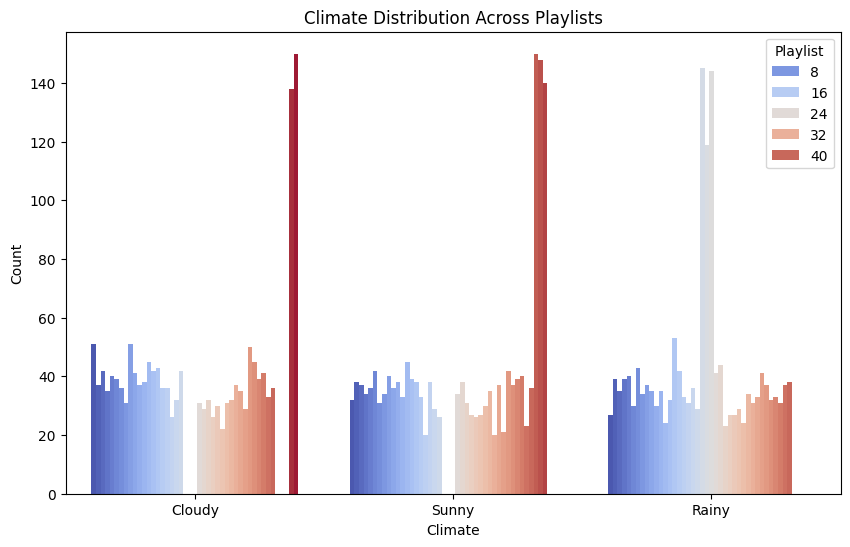

In [8]:
# Distribution of 'Climate' vs. Playlists
plt.figure(figsize=(10, 6))
sns.countplot(x='Climate', hue='Playlist', data=data, palette='coolwarm')
plt.title('Climate Distribution Across Playlists')
plt.xlabel('Climate')
plt.ylabel('Count')
plt.legend(title='Playlist')
plt.show()


C:\conda_tmp\ipykernel_5808\2360024627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Time', y='Playlist', data=data, palette='Set3')


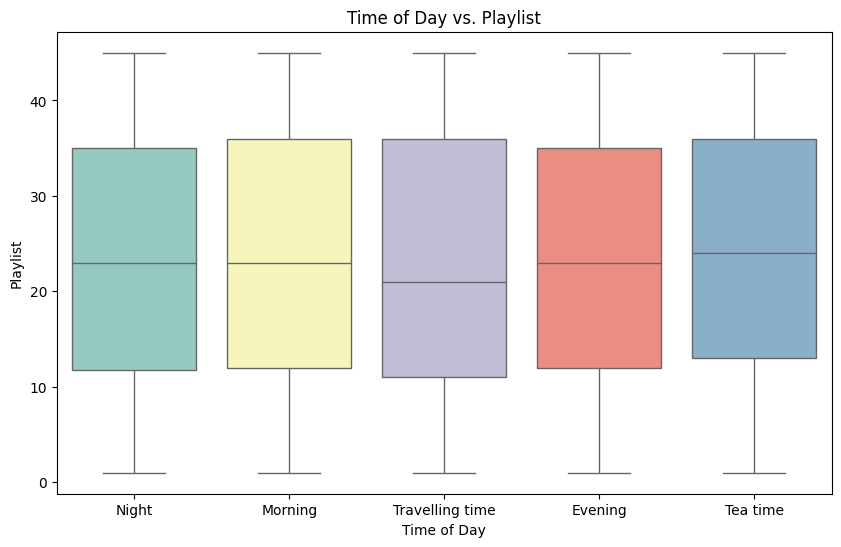

In [9]:
# Time of Day vs. Playlists
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', y='Playlist', data=data, palette='Set3')
plt.title('Time of Day vs. Playlist')
plt.xlabel('Time of Day')
plt.ylabel('Playlist')
plt.show()

In [10]:
# Correlation matrix (for numerical features only)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_columns) > 1:
    plt.figure(figsize=(8, 6))
    corr_matrix = data[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

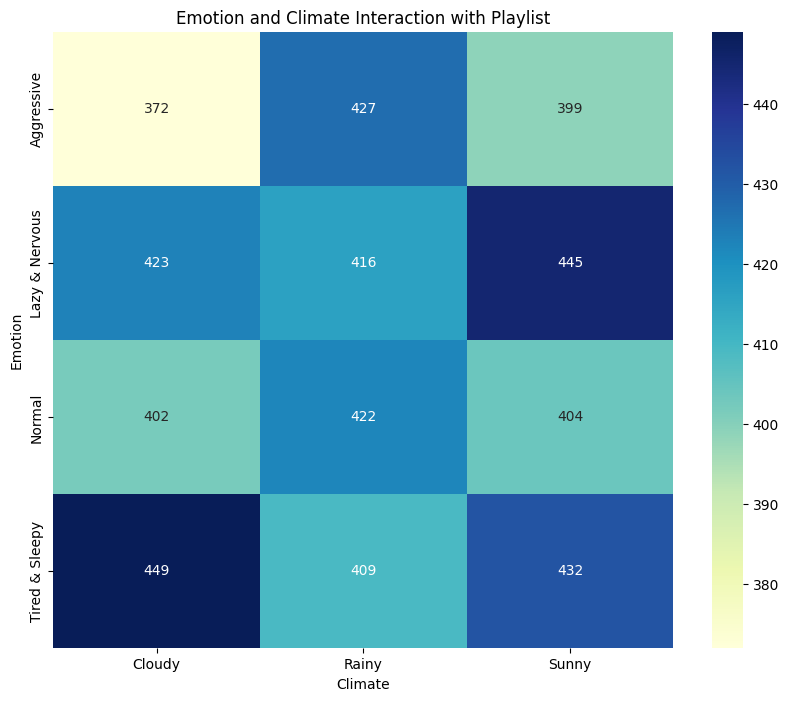

In [11]:
# Interaction Heatmap (Emotion vs. Climate vs. Target)
pivot_table = data.pivot_table(index='Emotion', columns='Climate', values='Playlist', aggfunc='count', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Emotion and Climate Interaction with Playlist')
plt.ylabel('Emotion')
plt.xlabel('Climate')
plt.show()

In [12]:
# Assume the dataset has three categorical input columns: 'cat1', 'cat2', 'cat3', and one numerical target: 'target'
categorical_columns = ['Emotion', 'Climate', 'Time']
target_column = 'Playlist'

In [13]:
# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [14]:
# Split data into features and target
X = data[categorical_columns]
y = data[target_column]

In [15]:
# Adjust y to start from 0 (if necessary)
y = y - y.min()

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [18]:
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Save the best model object
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model  # Save the actual model object

--- Logistic Regression ---
Accuracy: 0.067
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.10      0.25      0.14        12
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00        29
           5       0.10      0.17      0.12        23
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        26
           8       0.07      0.17      0.10        30
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        31
          15       0.05      0.09      0.06        23
          16       0.08      0.10    

g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- Random Forest ---
Accuracy: 0.077
              precision    recall  f1-score   support

           0       0.13      0.25      0.17        16
           1       0.12      0.17      0.14        12
           2       0.09      0.04      0.06        25
           3       0.05      0.04      0.04        27
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        23
           6       0.08      0.07      0.07        15
           7       0.11      0.08      0.09        26
           8       0.10      0.17      0.13        30
           9       0.00      0.00      0.00        15
          10       0.06      0.09      0.07        23
          11       0.00      0.00      0.00        29
          12       0.15      0.11      0.12        19
          13       0.00      0.00      0.00        25
          14       0.08      0.19      0.12        31
          15       0.03      0.09      0.05        23
          16       0.08      0.05      0.06

g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Sup

--- XGBoost ---
Accuracy: 0.081
              precision    recall  f1-score   support

           0       0.13      0.25      0.17        16
           1       0.12      0.17      0.14        12
           2       0.09      0.04      0.06        25
           3       0.05      0.04      0.04        27
           4       0.00      0.00      0.00        29
           5       0.07      0.09      0.08        23
           6       0.08      0.07      0.07        15
           7       0.00      0.00      0.00        26
           8       0.10      0.17      0.13        30
           9       0.00      0.00      0.00        15
          10       0.06      0.09      0.07        23
          11       0.00      0.00      0.00        29
          12       0.15      0.11      0.12        19
          13       0.00      0.00      0.00        25
          14       0.08      0.26      0.13        31
          15       0.04      0.09      0.06        23
          16       0.08      0.05      0.06      

g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# Display the best model
print(f"\nBest Model: {best_model} with Accuracy: {best_accuracy}")


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...) with Accuracy: 0.081


In [20]:
# Cross-validation scores for a deeper evaluation
print("\nCross-validation scores:")
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


Cross-validation scores:
Logistic Regression: Mean Accuracy = 0.0854, Std = 0.0050
Random Forest: Mean Accuracy = 0.0906, Std = 0.0039


g:\GitHub\AL_Support\stresslevel\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:52:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
g:\GitHub\AL_Support\stresslevel\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:53:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
g:\GitHub\AL_Suppor

XGBoost: Mean Accuracy = 0.0954, Std = 0.0063


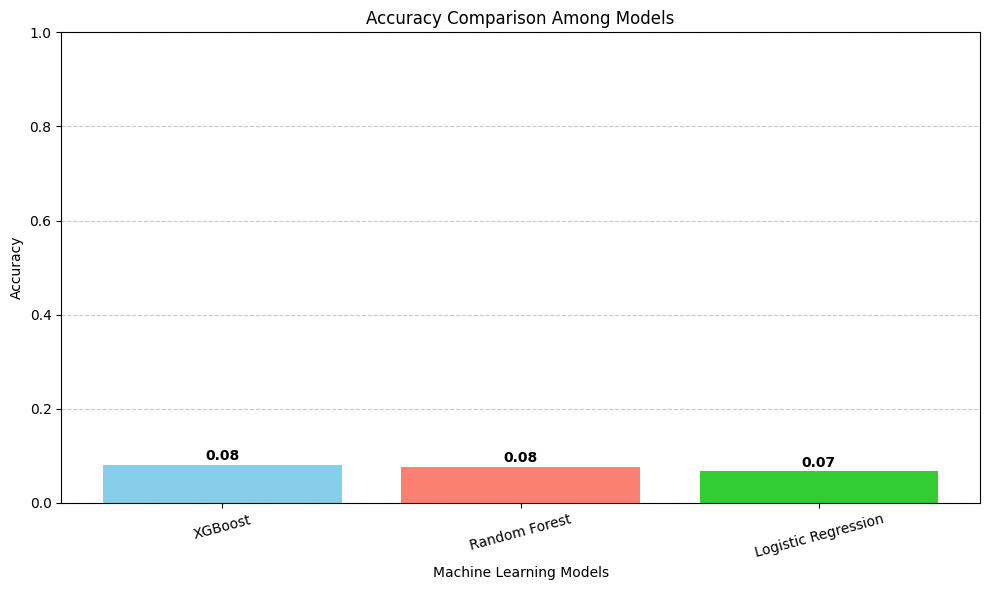

In [21]:
# Convert results to a sorted list for better visualization
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Unpack model names and their accuracies
model_names, accuracies = zip(*sorted_results)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'limegreen'])
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Among Models')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
import joblib

# Paths to save the files
best_model_path = "best_model.pkl"
encoders_path = "label_encoders.pkl"
scaler_path = "scaler.pkl"

# Save the best model
joblib.dump(best_model, best_model_path)
print(f"Best model saved to {best_model_path}")

# Save the encoders
joblib.dump(label_encoders, encoders_path)
print(f"Label encoders saved to {encoders_path}")

# Save the scaler
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

Best model saved to best_model.pkl
Label encoders saved to label_encoders.pkl
Scaler saved to scaler.pkl


In [23]:
import joblib
import numpy as np

# Paths to load the saved files
best_model_path = "best_model.pkl"
encoders_path = "label_encoders.pkl"
scaler_path = "scaler.pkl"

# Load the saved objects
best_model = joblib.load(best_model_path)
label_encoders = joblib.load(encoders_path)
scaler = joblib.load(scaler_path)

# Example sample input
# Replace these with actual test values for 'emotion', 'climate', and 'time_of_day'
sample_input = {
    'Emotion': 'Aggressive',       # Example categorical value
    'Climate': 'Cloudy',       # Example categorical value
    'Time': 'Morning'  # Example categorical value
}

# Prepare the sample input
def preprocess_sample(sample, encoders, scaler):
    # Encode categorical columns
    encoded = []
    for col, encoder in encoders.items():
        if col in sample:
            encoded.append(encoder.transform([sample[col]])[0])
    
    # Convert to NumPy array and reshape
    encoded = np.array(encoded).reshape(1, -1)  
    
    # Scale the numerical data (if applicable, though here all features are categorical)
    scaled = scaler.transform(encoded)
    
    return scaled

# Preprocess the input
preprocessed_input = preprocess_sample(sample_input, label_encoders, scaler)

# Make prediction
predicted_class = best_model.predict(preprocessed_input)
print(f"Predicted Playlist: {predicted_class[0]}")


Predicted Playlist: 44


g:\GitHub\AL_Support\stresslevel\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
